# LSTM

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_json("../data/example00593.json", orient='series')
dataset_train = df[df['date']<"2021-01-01"]
training_set = dataset_train.iloc[:, 1:2].values

dataset_test = df[df['date']>"2021-01-01"]
dataset_train.head()

,date,open,high,low,close,volume
0,1997-04-25,1058,1058,1036,1041,77790
1,1997-04-26,1042,1084,1040,1085,81190
2,1997-04-28,1102,1102,1084,1094,95340
3,1997-04-29,1093,1093,1074,1087,131070
4,1997-04-30,1083,1086,1067,1078,131410


In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [42]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 8s 51ms/step - loss: 0.0012
Epoch 2/100
62/62 [==============================] - 3s 51ms/step - loss: 9.8940e-05
Epoch 3/100
62/62 [==============================] - 3s 51ms/step - loss: 8.5249e-05
Epoch 4/100
62/62 [==============================] - 3s 51ms/step - loss: 8.1107e-05
Epoch 5/100
62/62 [==============================] - 3s 51ms/step - loss: 8.5461e-05
Epoch 6/100
62/62 [==============================] - 3s 51ms/step - loss: 7.0201e-05
Epoch 7/100
62/62 [==============================] - 3s 52ms/step - loss: 7.9864e-05
Epoch 8/100
62/62 [==============================] - 3s 52ms/step - loss: 5.6334e-05
Epoch 9/100
62/62 [==============================] - 3s 52ms/step - loss: 5.8827e-05
Epoch 10/100
62/62 [==============================] - 3s 51ms/step - loss: 4.9261e-05
Epoch 11/100
62/62 [==============================] - 3s 51ms/step - loss: 6.2942e-05
Epoch 12/100
62/62 [==============================] - 3s 51ms/step 

62/62 [==============================] - 4s 63ms/step - loss: 2.7462e-05
Epoch 97/100
62/62 [==============================] - 4s 60ms/step - loss: 2.7665e-05
Epoch 98/100
62/62 [==============================] - 4s 64ms/step - loss: 2.6004e-05
Epoch 99/100
62/62 [==============================] - 4s 63ms/step - loss: 2.8980e-05
Epoch 100/100
62/62 [==============================] - 4s 62ms/step - loss: 2.4245e-05


In [44]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

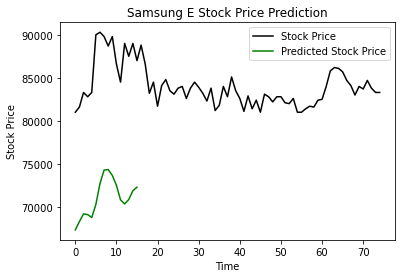

In [53]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Samsung E Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()